In [13]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# v range
n = 500
v = linspace(0.1,850.0,n)
day = 58.0 # choose March 1 for maximum grav. focusing effect

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta
sig_beta = HaloModel.SausageDispersionTensor

ndays = 100
days= linspace(0,365,ndays)

f1 = zeros(shape=(ndays,n))
f2 = zeros(shape=(ndays,n))

import time



t0 = time.time()
for i in range(0,ndays):
    f1[i,:] = SpeedDist_Triaxial(v,days[i],sig_beta,GravFocus=False)
t1 = time.time()
print 'time 1:',t1-t0
   
    
    
t0 = time.time()
for i in range(0,ndays):
    f2[i,:] = SpeedDist_Triaxial_alt(v,days[i],sig_beta,GravFocus=False) 
t1 = time.time()
print 'time 2:',t1-t0


time 1: 19.4292860031
time 2: 21.135256052


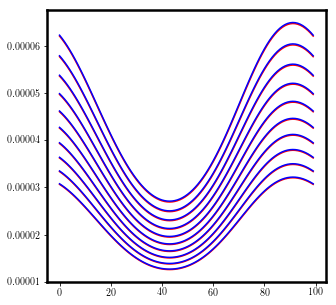

In [14]:
# Figure setup
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

for i in range(30,40):
    plt.plot(f1[:,i],'r-')
    plt.plot(f2[:,i],'b-')
plt.show()

0.0631292548201
0.0643615969889
0.0655324573935
0.0666366539832
0.0676695162575
0.068626893339
0.069505154686
0.070301184462
0.0710123706241
0.0716365897888
0.0721721888945
0.0726179646079
0.0729731413299
0.0732373485513
0.073410598194
0.0734932624617
0.0734860526094
0.0733899989376
0.0732064322167
0.0729369666608
0.0725834844891
0.0721481220465
0.0716332573932
0.0710414992273
0.0703756769589
0.0696388317261
0.0688342081157
0.0679652463322
0.0670355745529
0.0660490011946
0.0650095068272
0.0639212354716
0.0627884850382
0.0616156966815
0.0604074428766
0.0591684140576
0.0579034036992
0.0566172917751
0.055315026576
0.0540016049373
0.0526820509831
0.0513613935677
0.050044642658
0.0487367649685
0.0474426592223
0.0461671314659
0.0449148709087
0.0436904267899
0.0424981867893
0.0413423574942
0.0402269474089
0.0391557529474
0.0381323477783
0.0371600758044
0.0362420479451
0.0353811427681
0.0345800108746
0.0338410828003
0.0331665800426
0.032558528683
0.0320187749363
0.0315490018405
0.031150746199


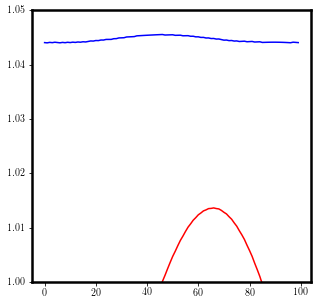

In [65]:
# Figure setup
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

rho1 = zeros(shape=ndays)
rho2 = zeros(shape=ndays)
for i in range(0,ndays):
    v_lab = LabFuncs.LabVelocitySimple(days[i])
    ve = norm(v_lab)
    qsq = ((v_lab[0]*sig_beta[0]) + (v_lab[1]*sig_beta[0]) + (v_lab[2]*sig_beta[2]))/ve
    print exp(-v_esc**2.0/(2*qsq**2.0))/3
    rho1[i] = trapz(f1[i,:],v)-exp(-v_esc**2.0/(2*qsq**2.0))/3
    rho2[i] = trapz(f2[i,:],v)
plt.plot(rho1,'r-')
plt.plot(rho2,'b-')
plt.ylim([1.0,1.05])
plt.show()


In [68]:
sigr = sig_beta[0]
sigphi = sig_beta[1]
sigz = sig_beta[2]
beta = 1.0-(sigphi**2.0+sigz**2.0)/(2*sigr**2.0)
print 1.0/Nesc_Triaxial(sigr,sigphi,beta,v_esc)

1.05091812676
